In [2]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import numpy as np

In [63]:
series = []

for i in range(0,50,2):
    series.append(10000/((3*i-12)/2*i*i+1))
df = pd.DataFrame(series)
df = df+0.001*np.random.rand(25,1)
df.tail()

,0
20,0.115983
21,0.100201
22,0.086563
23,0.075114
24,0.065802


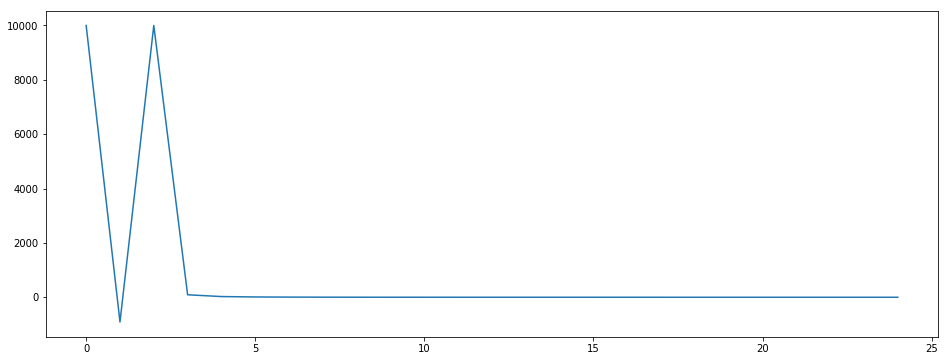

In [64]:
plt.figure(figsize=(16,6))
plt.plot(df)

In [65]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Au rang=%f predicted=%f, expected=%f' % (t,yhat, obs))

Au rang=0.000000 predicted=-898.872753, expected=0.233418
Au rang=1.000000 predicted=-830.812895, expected=0.192498
Au rang=2.000000 predicted=-772.277367, expected=0.161374
Au rang=3.000000 predicted=-720.906518, expected=0.136713
Au rang=4.000000 predicted=-676.408246, expected=0.115983
Au rang=5.000000 predicted=-636.687751, expected=0.100201
Au rang=6.000000 predicted=-601.483282, expected=0.086563
Au rang=7.000000 predicted=-569.900056, expected=0.075114
Au rang=8.000000 predicted=-541.293838, expected=0.065802


In [66]:
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
plt.figure(figsize=(16,6))
pyplot.plot(test[4:6],color = 'b')
pyplot.plot(predictions[4:6], color='orange')
pyplot.show()

NameError: name 'pyplot' is not defined

<Figure size 1152x432 with 0 Axes>

In [37]:
series = []

for i in range(0,50,2):
    series.append(10000/((3*i-12)/2*i*i+1))
df = pd.DataFrame(series)
df = df+0.001*np.random.rand(25,1)

model = ARIMA(df.values, order=(7,2,0))
model_fit = model.fit(disp=0)
# one-step out of sample forecast
start_index = len(df.values)
end_index = start_index
forecast = model_fit.predict(start=start_index, end=end_index)

print('Forecast: %f' % forecast)

Forecast: 0.001211


/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


,0
20,0.115802
21,0.100377
22,0.086923
23,0.075014
24,0.066305


,0
0,10000.000382
1,-909.090801
2,10000.000770
3,91.743617
4,25.974403
5,11.099563
6,5.783742
7,3.401073
8,2.170403
9,1.469557
